# EXPORTAÇÃO DOS DADOS

## Nessa etapa será feito a captação dos dados e como estão em datasets separados, farei também a junção deles através da chave primária

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [92]:
venda = pd.read_csv('fact_table.csv', encoding= 'cp860')
venda

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0
...,...,...,...,...,...,...,...,...,...
999995,P010,C003726,T09247,I00063,S00502,5,cans,40.0,200.0
999996,P021,C002581,T023483,I00252,S00225,1,ct,11.0,11.0
999997,P035,C006133,T039372,I00119,S00555,7,ct,53.0,371.0
999998,P031,C008735,T097975,I00257,S00440,2,ct,21.0,42.0


In [93]:
item = pd.read_csv('item_dim.csv', encoding= 'cp860')
item

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans
...,...,...,...,...,...,...,...
259,I00260,Napkins Square Lunch,Kitchen Supplies,15.00,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,ct
260,I00261,POM 2 ply paper towels,Kitchen Supplies,33.00,Lithuania,BIGSO AB,ct
261,I00262,Strong Everyday Napkins,Kitchen Supplies,14.00,Netherlands,Bolsius Boxmeer,ct
262,I00263,Advil 2 pill packets,Medicine,14.00,Lithuania,BIGSO AB,Ct


In [94]:
loja = pd.read_csv('store_dim.csv', encoding= 'cp860')
loja

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR
...,...,...,...,...
721,S00722,BARISAL,BARISAL,HIZLA
722,S00723,BARISAL,BARISAL,BARISAL SADAR (KOTWALI)
723,S00724,BARISAL,BARISAL,MEHENDIGANJ
724,S00725,BARISAL,BARISAL,MULADI


In [95]:
hora_da_venda = pd.read_csv('time_dim.csv', encoding= 'cp860')
hora_da_venda

,time_key,date,hour,day,week,month,quarter,year
0,T00001,20-05-2017 14:56,14,20,3rd Week,5,Q2,2017
1,T00002,30-01-2015 22:14,22,30,4th Week,1,Q1,2015
2,T00003,14-03-2020 02:34,2,14,2nd Week,3,Q1,2020
3,T00004,27-04-2018 12:19,12,27,4th Week,4,Q2,2018
4,T00005,14-04-2018 10:43,10,14,2nd Week,4,Q2,2018
...,...,...,...,...,...,...,...,...
99994,T099995,04-01-2015 17:22,17,4,1st Week,1,Q1,2015
99995,T099996,17-01-2015 21:09,21,17,3rd Week,1,Q1,2015
99996,T099997,23-01-2020 14:42,14,23,4th Week,1,Q1,2020
99997,T099998,31-10-2015 13:52,13,31,4th Week,10,Q4,2015


In [96]:
forma_de_pagamento = pd.read_csv('trans_dim.csv', encoding= 'cp860')
forma_de_pagamento.head()

,payment_key,trans_type,bank_name
0,P001,cash,NaN
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited


## UNINDO TABELAS DE VENDAS COM TABELAS DE PRODUTOS RELACIONANDO SEUS RESPECTIVOS NOMES

In [97]:
# Carregando os arquivos CSV's 

vendas_df = pd.read_csv('fact_table.csv', encoding= 'cp860')

produtos_df = pd.read_csv('item_dim.csv', encoding= 'cp860')

pagamento_df = pd.read_csv('Trans_dim.csv', encoding= 'cp860')

hora_df = pd.read_csv('time_dim.csv', encoding= 'cp860')

loja_df = pd.read_csv('store_dim.csv', encoding= 'cp860')

# Criando dicionários e mapeando IDs para seus respectivos nomes :

id_to_nome = produtos_df.set_index('item_key')['item_name'].to_dict()

# Formas de pagamento
id_to_pagamento = pagamento_df.set_index('payment_key')['trans_type'].to_dict()

# Horário Venda
id_to_hora = hora_df.set_index('time_key')['date'].to_dict()

# Loja
id_to_loja = loja_df.set_index('store_key')['district'].to_dict()

# Criando novas colunas referentes aos dicionários criados anteriormente 


vendas_df['Produto'] = vendas_df['item_key'].map(id_to_nome)

vendas_df['Forma de Pagamento'] = vendas_df['payment_key'].map(id_to_pagamento)

vendas_df['Hora da Venda'] = vendas_df['time_key'].map(id_to_hora)

vendas_df['Loja'] = vendas_df['store_key'].map(id_to_loja)

# Salvando o DataFrame

# vendas_df.to_csv('vendas.csv', index=False)

print("CSVs unidos com sucesso!")


CSVs unidos com sucesso!


In [98]:
ecommerce_unificado = pd.read_csv('vendas.csv', encoding= 'cp860')
ecommerce_unificado

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,Produto,Forma de Pagamento,Hora da Venda,Loja
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,card,26-04-2016 17:13,JAMALPUR
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0,Charmin Ultra Bath Tissue,card,11-06-2018 19:08,DHAKA
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0,Dole Fruit in Gel Cups 4.3 oz,card,19-11-2016 08:19,NOAKHALI
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0,Paper Bowls 20 oz Ultra Strong,card,01-02-2020 06:00,RANGPUR
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0,Waterloo Sparkling Watermelon 12oz,card,15-07-2014 02:58,KHAGRACHHARI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,P010,C003726,T09247,I00063,S00502,5,cans,40.0,200.0,Red Bull 8.4 oz,card,22-07-2020 23:42,NOAKHALI
999996,P021,C002581,T023483,I00252,S00225,1,ct,11.0,11.0,Dial Anti-bacterial Foam 7.5oz,card,19-01-2020 02:07,SATKHIRA
999997,P035,C006133,T039372,I00119,S00555,7,ct,53.0,371.0,K Cups Original Donut Shop Med. Roast,card,27-10-2017 09:52,PIROJPUR
999998,P031,C008735,T097975,I00257,S00440,2,ct,21.0,42.0,Large Trash Bags Black 33 gal,card,09-06-2014 04:12,CHITTAGONG


# PREPARAÇÃO DOS DADOS

In [99]:
ecommerce_unificado.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,Produto,Forma de Pagamento,Hora da Venda,Loja
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,card,26-04-2016 17:13,JAMALPUR
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0,Charmin Ultra Bath Tissue,card,11-06-2018 19:08,DHAKA
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0,Dole Fruit in Gel Cups 4.3 oz,card,19-11-2016 08:19,NOAKHALI
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0,Paper Bowls 20 oz Ultra Strong,card,01-02-2020 06:00,RANGPUR
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0,Waterloo Sparkling Watermelon 12oz,card,15-07-2014 02:58,KHAGRACHHARI


In [100]:
# Nesse bloco de código irei renomear as colunas.

ecommerce_unificado.rename(columns={'item_key': 'Chave do Produto','quantity': 'Quantidade', 'unit_price': 'Preco Unitario', 'total_price': 'Preco Total', 'Loja' : 'Local da Loja' }, inplace=True)
ecommerce_unificado.head()


,payment_key,coustomer_key,time_key,Chave do Produto,store_key,Quantidade,unit,Preco Unitario,Preco Total,Produto,Forma de Pagamento,Hora da Venda,Local da Loja
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,card,26-04-2016 17:13,JAMALPUR
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0,Charmin Ultra Bath Tissue,card,11-06-2018 19:08,DHAKA
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0,Dole Fruit in Gel Cups 4.3 oz,card,19-11-2016 08:19,NOAKHALI
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0,Paper Bowls 20 oz Ultra Strong,card,01-02-2020 06:00,RANGPUR
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0,Waterloo Sparkling Watermelon 12oz,card,15-07-2014 02:58,KHAGRACHHARI


In [101]:
# Reordenando e apagando as colunas inúteis

df = ecommerce_unificado[['Produto', 'Quantidade', 'Preco Unitario', 'Preco Total', 'Forma de Pagamento', 'Hora da Venda', 'Local da Loja', 'Chave do Produto']]
df

,Produto,Quantidade,Preco Unitario,Preco Total,Forma de Pagamento,Hora da Venda,Local da Loja,Chave do Produto
0,M&M Peanut Candy 1.7 oz,1,35.0,35.0,card,26-04-2016 17:13,JAMALPUR,I00177
1,Charmin Ultra Bath Tissue,1,26.0,26.0,card,11-06-2018 19:08,DHAKA,I00248
2,Dole Fruit in Gel Cups 4.3 oz,8,12.5,100.0,card,19-11-2016 08:19,NOAKHALI,I00195
3,Paper Bowls 20 oz Ultra Strong,8,14.0,112.0,card,01-02-2020 06:00,RANGPUR,I00131
4,Waterloo Sparkling Watermelon 12oz,8,8.0,64.0,card,15-07-2014 02:58,KHAGRACHHARI,I00050
...,...,...,...,...,...,...,...,...
999995,Red Bull 8.4 oz,5,40.0,200.0,card,22-07-2020 23:42,NOAKHALI,I00063
999996,Dial Anti-bacterial Foam 7.5oz,1,11.0,11.0,card,19-01-2020 02:07,SATKHIRA,I00252
999997,K Cups Original Donut Shop Med. Roast,7,53.0,371.0,card,27-10-2017 09:52,PIROJPUR,I00119
999998,Large Trash Bags Black 33 gal,2,21.0,42.0,card,09-06-2014 04:12,CHITTAGONG,I00257


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Produto             1000000 non-null  object 
 1   Quantidade          1000000 non-null  int64  
 2   Preco Unitario      1000000 non-null  float64
 3   Preco Total         1000000 non-null  float64
 4   Forma de Pagamento  1000000 non-null  object 
 5   Hora da Venda       1000000 non-null  object 
 6   Local da Loja       1000000 non-null  object 
 7   Chave do Produto    1000000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 61.0+ MB


In [103]:
df['Hora da Venda'] = pd.to_datetime(df['Hora da Venda'], errors='coerce');

C:\Users\PC\AppData\Local\Temp\ipykernel_5728\286939283.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Hora da Venda'] = pd.to_datetime(df['Hora da Venda'], errors='coerce');
C:\Users\PC\AppData\Local\Temp\ipykernel_5728\286939283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hora da Venda'] = pd.to_datetime(df['Hora da Venda'], errors='coerce');


In [104]:
df.head()

,Produto,Quantidade,Preco Unitario,Preco Total,Forma de Pagamento,Hora da Venda,Local da Loja,Chave do Produto
0,M&M Peanut Candy 1.7 oz,1,35.0,35.0,card,2016-04-26 17:13:00,JAMALPUR,I00177
1,Charmin Ultra Bath Tissue,1,26.0,26.0,card,2018-06-11 19:08:00,DHAKA,I00248
2,Dole Fruit in Gel Cups 4.3 oz,8,12.5,100.0,card,2016-11-19 08:19:00,NOAKHALI,I00195
3,Paper Bowls 20 oz Ultra Strong,8,14.0,112.0,card,2020-02-01 06:00:00,RANGPUR,I00131
4,Waterloo Sparkling Watermelon 12oz,8,8.0,64.0,card,2014-07-15 02:58:00,KHAGRACHHARI,I00050


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Produto             1000000 non-null  object        
 1   Quantidade          1000000 non-null  int64         
 2   Preco Unitario      1000000 non-null  float64       
 3   Preco Total         1000000 non-null  float64       
 4   Forma de Pagamento  1000000 non-null  object        
 5   Hora da Venda       1000000 non-null  datetime64[ns]
 6   Local da Loja       1000000 non-null  object        
 7   Chave do Produto    1000000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 61.0+ MB


In [106]:
mapeamento = {'cash': 0, 'card': 1, 'mobile': 2}

df['Forma de Pagamento'] = df['Forma de Pagamento'].replace(mapeamento)

C:\Users\PC\AppData\Local\Temp\ipykernel_5728\3969368548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forma de Pagamento'] = df['Forma de Pagamento'].replace(mapeamento)


In [107]:
df.sample(10)

,Produto,Quantidade,Preco Unitario,Preco Total,Forma de Pagamento,Hora da Venda,Local da Loja,Chave do Produto
464948,Fresca Black Cherry - 12 oz cans,9,6.75,60.75,1,2020-08-09 13:49:00,NATORE,I00017
13595,Foam Coffee Cups - 20 ounce,5,29.00,145.00,1,2020-01-05 03:32:00,KISHOREGONJ,I00140
88576,Nature Valley Soft Oatmeal Squares,3,15.00,45.00,2,2016-11-09 01:07:00,SYLHET,I00206
404731,Tylenol Extra Strength 2 pill packets,8,15.00,120.00,1,2021-01-14 16:21:00,DHAKA,I00264
711441,Red Bull 8.4 oz,5,40.00,200.00,1,2015-10-26 17:01:00,DHAKA,I00063
998594,Coke Classic 12 oz cans,7,6.75,47.25,0,2019-01-12 03:38:00,NAOGAON,I00007
256158,Bounty Paper Towels Select a Size,10,26.00,260.00,1,2018-06-29 10:37:00,DINAJPUR,I00245
746690,Cascade Gel w/ Dawn Dishwasher,8,15.00,120.00,2,2019-03-02 18:07:00,NATORE,I00247
125483,Frito Classic Mix Variety,4,17.00,68.00,1,2019-08-09 11:40:00,TANGAIL,I00160
474819,Ocean Spray Cranberry Juice Cocktail 15oz,7,14.00,98.00,1,2017-08-21 13:39:00,JAMALPUR,I00083


In [108]:
vendas_por_loja = df.groupby('Local da Loja')['Preco Total'].sum()

# Encontrar a loja com o maior número de vendas
loja_mais_vendida = vendas_por_loja.idxmax()

# Filtrar os dados para incluir apenas a loja mais vendida
dados_loja_mais_vendida = df[df['Local da Loja'] == loja_mais_vendida]

dados_loja_mais_vendida

,Produto,Quantidade,Preco Unitario,Preco Total,Forma de Pagamento,Hora da Venda,Local da Loja,Chave do Produto
1,Charmin Ultra Bath Tissue,1,26.00,26.0,1,2018-06-11 19:08:00,DHAKA,I00248
9,Clear Plastic Cups 9oz,10,15.00,150.0,1,2018-02-13 01:12:00,DHAKA,I00133
12,Breath Savers Peppermints 12/roll,3,16.00,48.0,1,2019-04-19 03:38:00,DHAKA,I00237
17,Doritos Nacho Cheese 1 oz,9,17.00,153.0,1,2016-11-26 10:50:00,DHAKA,I00155
19,Cheez It White Cheddar 1.5 oz,4,15.00,60.0,1,2021-01-09 19:34:00,DHAKA,I00153
...,...,...,...,...,...,...,...,...
999976,Cheese and Peanut Butter Crackers,11,12.00,132.0,1,2015-03-22 17:05:00,DHAKA,I00222
999979,Nestle Purelife 16oz,9,7.50,67.5,1,2015-10-07 21:45:00,DHAKA,I00091
999982,Monster Lo-Carb 16 oz,3,40.00,120.0,1,2014-04-21 08:35:00,DHAKA,I00052
999985,Diet Coke Caffeine Free 12oz cans,4,6.75,27.0,1,2017-06-05 19:52:00,DHAKA,I00011


In [109]:
dados_loja_mais_vendida.to_csv('dados_analise.csv')

# ANÁLISE EXPLORATÓRIA

In [110]:
df = pd.read_csv('dados_analise.csv')
df.sample(15)

,Unnamed: 0,Produto,Quantidade,Preco Unitario,Preco Total,Forma de Pagamento,Hora da Venda,Local da Loja,Chave do Produto
171449,765822,K Cups ├ÜOrganic Breakfast Blend,8,42.00,336.00,1,2014-06-08 13:59:00,DHAKA,I00118
42922,192309,Chobani Greek Yogurt Variety Pack,10,16.00,160.00,1,2018-01-22 16:55:00,DHAKA,I00190
23146,103813,Sprite - 12 oz cans,4,16.25,65.00,1,2020-01-04 01:12:00,DHAKA,I00027
53686,239740,Gatorade Zero Variety 20 oz,7,20.00,140.00,1,2020-03-15 00:50:00,DHAKA,I00074
109609,489379,Starbuck's Pike Place,8,22.50,180.00,1,2019-07-12 12:22:00,DHAKA,I00110
137470,613800,Frito Fiesta Flavors Variety,9,17.00,153.00,1,2016-06-20 04:24:00,DHAKA,I00161
34529,155258,Ozarka Spring Water Mini 8oz,11,11.00,121.00,1,2019-02-04 23:44:00,DHAKA,I00094
78933,353311,Monster Original Green 16 oz,4,40.00,160.00,1,2015-05-13 22:24:00,DHAKA,I00053
222231,992364,Kleenex Tissue Square Boxes 75/box,2,20.00,40.00,1,2016-02-27 04:11:00,DHAKA,I00256
142359,635983,Advil 2 pill packets,11,14.00,154.00,2,2017-04-04 23:10:00,DHAKA,I00263


In [111]:
# Calculando estatísticas descritivas para Quantidade Vendida
descricao_quantidade_vendida = df['Quantidade'].describe()

# Calculando estatísticas descritivas para Preço Unitário
descricao_preco_unitario = df['Preco Unitario'].describe()

# Calculando estatísticas descritivas para Preço Total
descricao_preco_total = df['Preco Total'].describe()

# Fazendo a contagem de formas de pagamento
contagem_formas_pagamento = df['Forma de Pagamento'].value_counts()

# Fazendo a contagem de horas de venda
contagem_horas_venda = df['Hora da Venda'].value_counts()



In [112]:
print("Estatísticas descritivas para a Quantidade Vendida:")
descricao_quantidade_vendida


Estatísticas descritivas para a Quantidade Vendida:


count    224034.000000
mean          6.000509
std           3.166870
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          11.000000
Name: Quantidade, dtype: float64

In [113]:
print("\nEstatísticas descritivas para o Preço Unitário:")
descricao_preco_unitario


Estatísticas descritivas para o Preço Unitário:


count    224034.000000
mean         17.552451
std           8.627191
min           6.000000
25%          13.000000
50%          16.000000
75%          20.000000
max          55.000000
Name: Preco Unitario, dtype: float64

In [114]:
print("\nEstatísticas descritivas para o Preço Total:")
descricao_preco_total


Estatísticas descritivas para o Preço Total:


count    224034.000000
mean        105.330535
std          80.861373
min           6.000000
25%          47.250000
50%          90.000000
75%         144.000000
max         605.000000
Name: Preco Total, dtype: float64

In [115]:
print("\nContagem de formas de pagamento:")
contagem_formas_pagamento


Contagem de formas de pagamento:


Forma de Pagamento
1    200905
2     17397
0      5732
Name: count, dtype: int64

In [116]:
print("\nContagem de horas de venda:")
contagem_horas_venda.head()


Contagem de horas de venda:


Hora da Venda
2015-08-02 10:36:00    12
2018-11-24 08:18:00    12
2019-05-23 08:03:00    12
2020-12-28 09:22:00    12
2018-01-29 14:06:00    12
Name: count, dtype: int64

In [117]:
preco_medio_ponderado = (df.groupby('Produto')[['Preco Unitario']].sum()
                          ['Preco Unitario'] * df['Quantidade']).sum() / df['Quantidade'].sum()

valor_total_por_produto = df['Preco Unitario'] * df['Quantidade']

top_7_produtos = valor_total_por_produto.sort_values(ascending=False).head(7)

top_7_produtos

102636    605.0
137723    605.0
6714      605.0
135201    605.0
123823    605.0
222497    605.0
99961     605.0
dtype: float64

In [118]:
quantidade_por_produto = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

# Selecionando os 10 produtos mais vendidos

top_n = 10 
top_produtos = quantidade_por_produto.head(top_n)
top_produtos

Produto
Pepsi - 12 oz cans                     10351
Coke Classic 12 oz cans                10203
Sprite - 12 oz cans                     9968
Muscle Milk Protein Shake Van. 11oz     9839
Diet Coke - 12 oz cans                  9758
A&W Root Beer - 12 oz cans              5722
Diet Pepsi - 12 oz cans                 5702
Folgers Classic Roast Coffee            5612
Reese's Pieces Peanutbutter Candy       5571
Diet Fuze Iced Tea                      5551
Name: Quantidade, dtype: int64

In [119]:
quantidade_por_produto = df.groupby('Produto')['Quantidade'].sum().sort_values()

# Selecionar os 10 produtos menos vendidos

tail_n = 10  
produtos_menos_vendidos = quantidade_por_produto.head(tail_n)
produtos_menos_vendidos

Produto
Dole Fruit in Gel Cups 4.3 oz             4394
Monster Java 15 oz                        4519
Gatorade X-Factor Fierce Variety 20 oz    4656
Double Bubble Variety Tub                 4685
Fiber One Bars Oats and Chocolate         4706
Keebler Cookie & Cracker Variety          4720
Coffee-Mate Original Flavor Cold          4730
Paper Bowls 20 oz Ultra Strong            4735
Frito BOLD Flavors Variety Pack           4746
Yoplait Original Yogurt Variety Pack      4746
Name: Quantidade, dtype: int64

In [120]:
df['Hora'] = pd.to_datetime(df['Hora da Venda']).dt.hour

# Calculando a contagem de vendas para cada hora

vendas_por_hora = df.groupby('Hora').size().sort_values(ascending=False)

top_horarios = vendas_por_hora.head(20)
top_horarios


Hora
14    9760
19    9707
9     9580
13    9548
10    9486
17    9479
12    9466
21    9416
7     9399
5     9386
23    9345
1     9310
8     9306
22    9284
15    9246
18    9230
20    9228
3     9227
0     9222
6     9164
dtype: int64

In [121]:
mapa_pagamento = {
    0: 'Dinheiro',
    1: 'Cartao',
    2: 'Aplicativo'
}

# Criação da nova coluna 'forma_pagamento_descricao'
df['Forma de Pagamento Extenso'] = df['Forma de Pagamento'].map(mapa_pagamento)

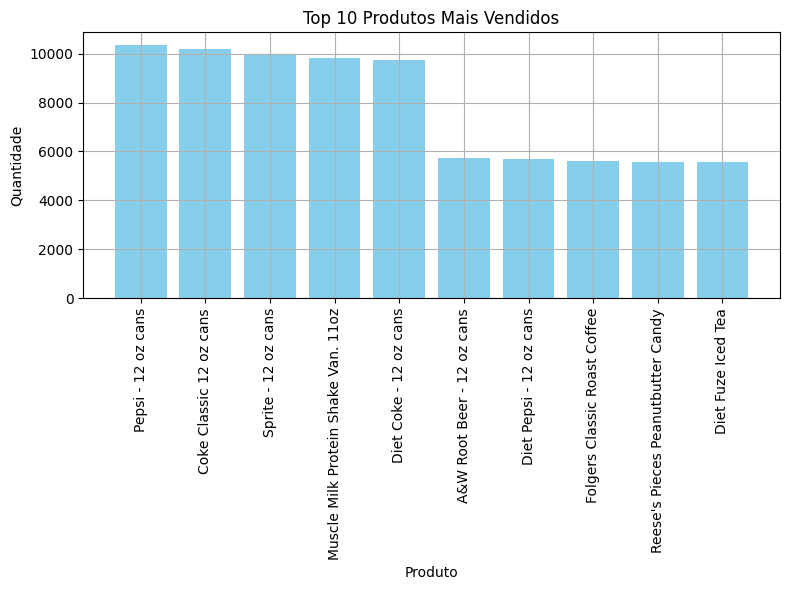

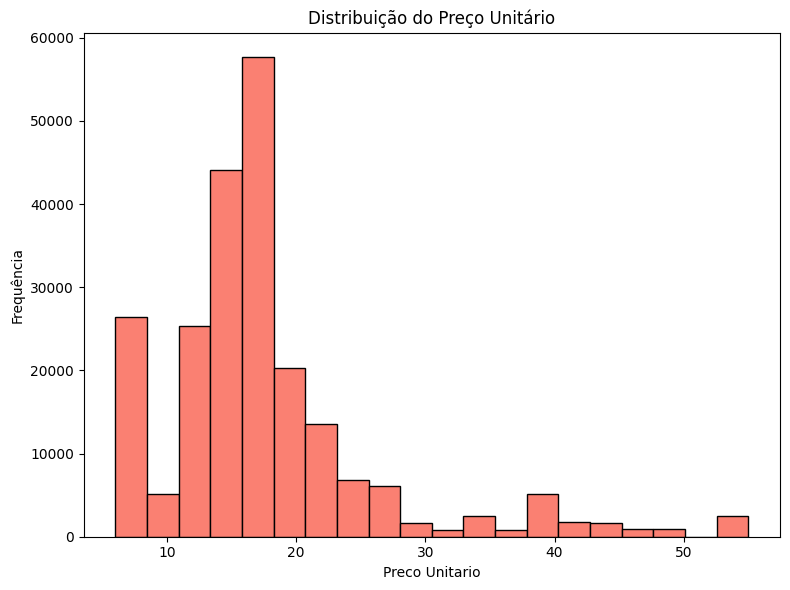

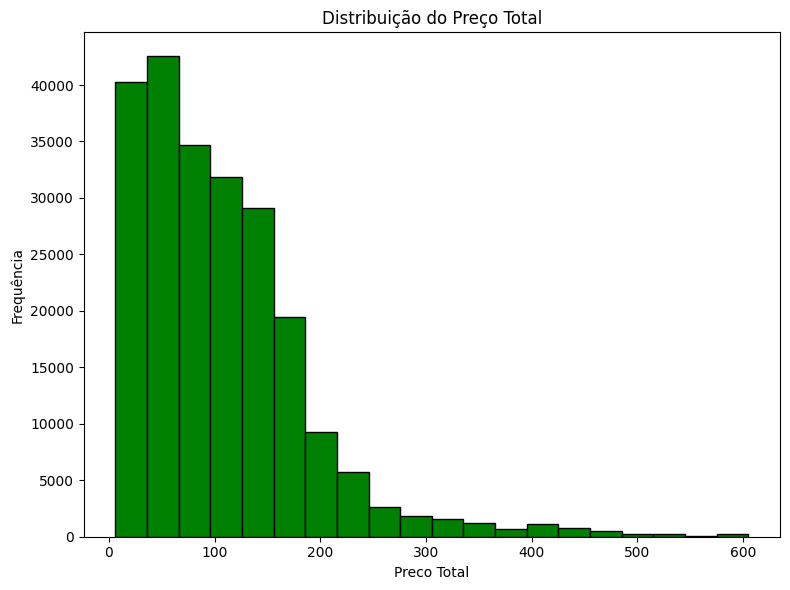

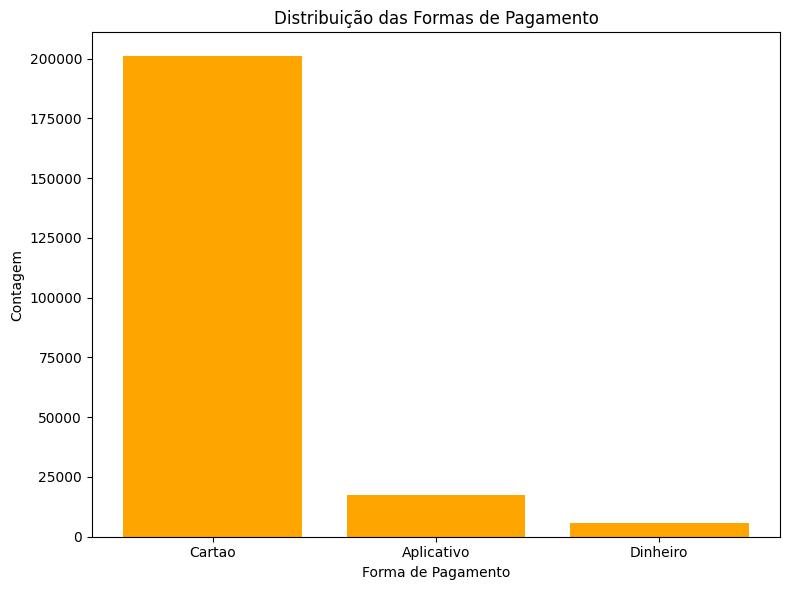

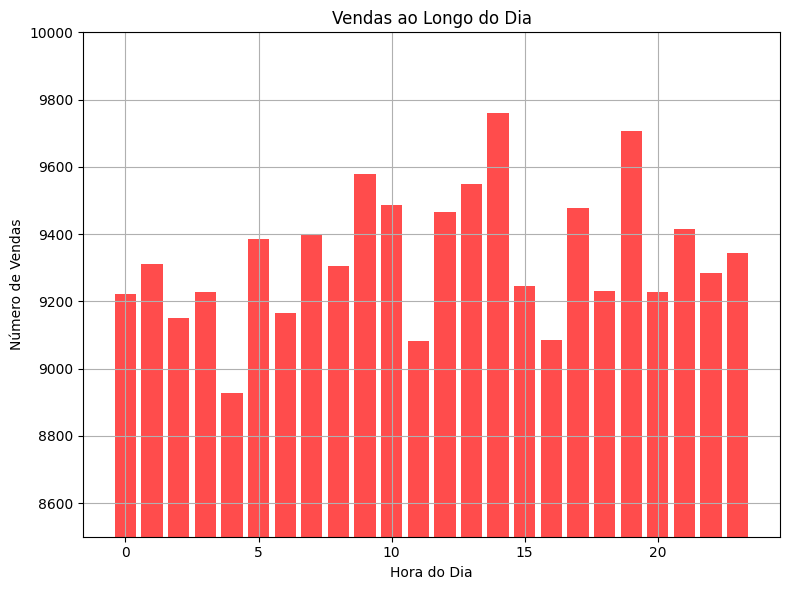

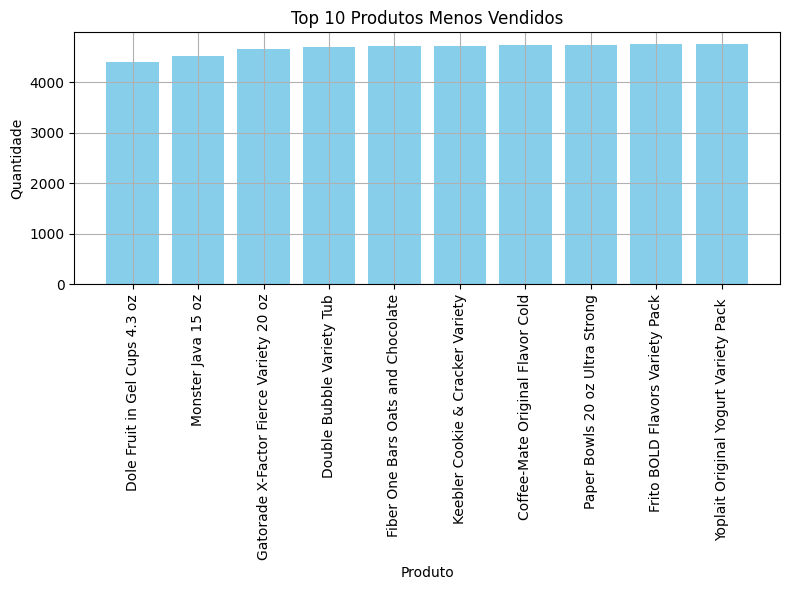

In [123]:
plt.figure(figsize=(8, 6))
plt.bar(top_produtos.index, top_produtos.values, color='skyblue')
plt.title(f'Top {top_n} Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Histograma do Preço Unitário
plt.figure(figsize=(8, 6))
plt.hist(df['Preco Unitario'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribuição do Preço Unitário')
plt.xlabel('Preco Unitario')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Histograma do Preço Total
plt.figure(figsize=(8, 6))
plt.hist(df['Preco Total'], bins=20, color='green', edgecolor='black')
plt.title('Distribuição do Preço Total')
plt.xlabel('Preco Total')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Gráfico de barras para a Forma de Pagamento
plt.figure(figsize=(8, 6))
forma_pagamento_counts = df['Forma de Pagamento Extenso'].value_counts()
plt.bar(forma_pagamento_counts.index, forma_pagamento_counts.values, color='orange')
plt.title('Distribuição das Formas de Pagamento')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

# Gráfico de linhas para a Hora da Venda
plt.figure(figsize=(8, 6))
plt.bar(vendas_por_hora.index, vendas_por_hora.values, color='red', alpha=0.7)
plt.title('Vendas ao Longo do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Vendas')
plt.grid(True)
plt.ylim(8500, 10000)
plt.tight_layout()
plt.show()

# Gráfico de barras dos produtos menos vendidos
plt.figure(figsize=(8, 6))
plt.bar(produtos_menos_vendidos.index, produtos_menos_vendidos.values, color='skyblue')
plt.title(f'Top {tail_n} Produtos Menos Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [124]:
df.drop(columns=['Forma de Pagamento Extenso'], inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224034 entries, 0 to 224033
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          224034 non-null  int64  
 1   Produto             224034 non-null  object 
 2   Quantidade          224034 non-null  int64  
 3   Preco Unitario      224034 non-null  float64
 4   Preco Total         224034 non-null  float64
 5   Forma de Pagamento  224034 non-null  int64  
 6   Hora da Venda       224034 non-null  object 
 7   Local da Loja       224034 non-null  object 
 8   Chave do Produto    224034 non-null  object 
 9   Hora                224034 non-null  int32  
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 16.2+ MB


In [126]:
df['Hora da Venda'] = pd.to_datetime(df['Hora da Venda'])

# Adicionando uma coluna para o dia da semana (0 = segunda-feira, 1 = terça-feira, ..., 6 = domingo)
df['Dia da Semana'] = df['Hora da Venda'].dt.dayofweek

# Mapeando os números de dia da semana para os nomes dos dias
nome_dia_semana = {
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    6: 'Domingo'
}

# Agrupando os dados por dia da semana e calculando a soma do número de vendas de cada dia
vendas_por_dia_da_semana = df.groupby('Dia da Semana').size()

# Encontrando o dia da semana com o maior número de vendas
dia_mais_vendido = vendas_por_dia_da_semana.idxmax()
numero_vendas_maximo = vendas_por_dia_da_semana.max()

print(f"O dia da semana com mais vendas é {nome_dia_semana[dia_mais_vendido]} com {numero_vendas_maximo} vendas.")

O dia da semana com mais vendas é Segunda-feira com 32459 vendas.


In [127]:
vendas_por_dia_da_semana_e_produto = df.groupby(['Dia da Semana', 'Produto'])['Quantidade'].sum()

# Para cada dia da semana, encontrar o produto mais vendido
produtos_mais_vendidos_por_dia_da_semana = vendas_por_dia_da_semana_e_produto.groupby(level=0).idxmax()

In [128]:
print("Produto mais vendido por dia da semana:")
for dia, produto in produtos_mais_vendidos_por_dia_da_semana.items():
    print(f"{nome_dia_semana[dia]}: {produto}")

Produto mais vendido por dia da semana:
Segunda-feira: (0, 'Coke Classic 12 oz cans')
Terça-feira: (1, 'Pepsi - 12 oz cans')
Quarta-feira: (2, 'Pepsi - 12 oz cans')
Quinta-feira: (3, 'Muscle Milk Protein Shake Van. 11oz')
Sexta-feira: (4, 'Sprite - 12 oz cans')
Sábado: (5, 'Pepsi - 12 oz cans')
Domingo: (6, 'Muscle Milk Protein Shake Van. 11oz')


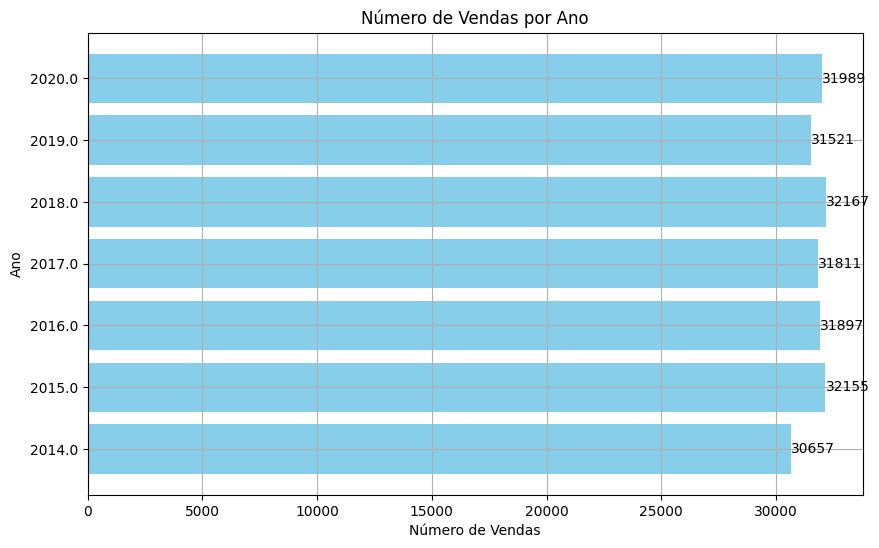

In [129]:
df['Ano'] = df['Hora da Venda'].dt.year

# Agrupando os dados por ano e calculando a soma do número de vendas de cada ano exceto 2021 pois possui poucos dados 
df_ano = df.loc[df['Ano'] != 2021]
vendas_por_ano = df.groupby(df_ano['Ano']).size()

# Gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(vendas_por_ano.index.astype(str), vendas_por_ano.values, color='skyblue')

for i, v in enumerate(vendas_por_ano.values):
    plt.text(v, i, str(v), ha='left', va='center')

plt.title('Número de Vendas por Ano')
plt.xlabel('Número de Vendas')
plt.ylabel('Ano')

plt.grid(True)  # Adicionar linhas de grade para melhor visualização
plt.show()

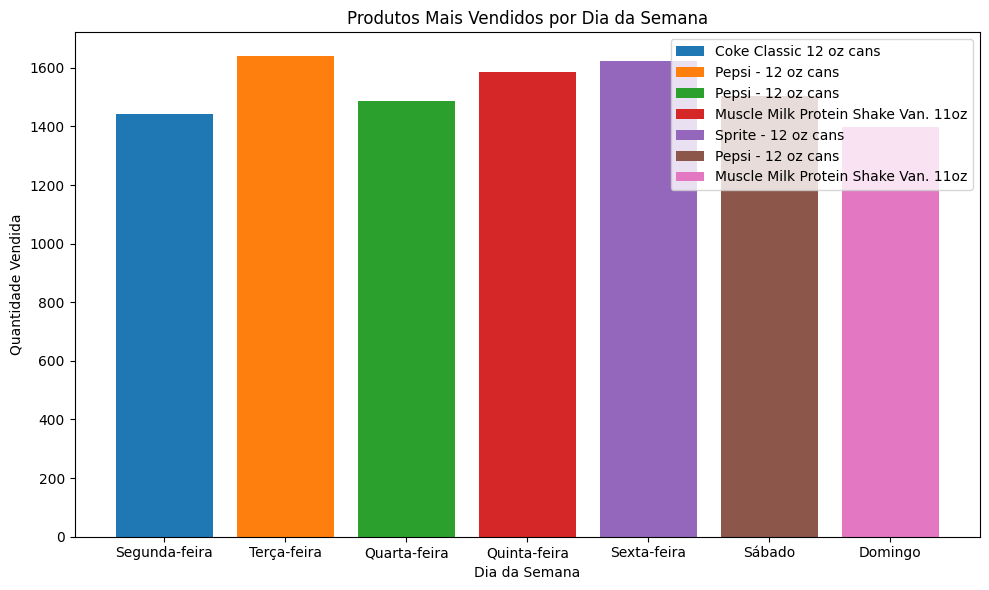

In [130]:
fig, ax = plt.subplots(figsize=(10, 6))

# Iterando sobre os resultados e plotar os dados
for dia, produto_tuple in produtos_mais_vendidos_por_dia_da_semana.items():
    nome_dia = nome_dia_semana[dia]
    produto = produto_tuple[1]  # O nome do produto está no segundo elemento da tupla
    vendas_produto = vendas_por_dia_da_semana_e_produto.loc[dia, produto]
    ax.bar(nome_dia, vendas_produto, label=produto)

ax.set_ylabel('Quantidade Vendida')
ax.set_xlabel('Dia da Semana')
ax.set_title('Produtos Mais Vendidos por Dia da Semana')
ax.legend()

plt.tight_layout()
plt.show()

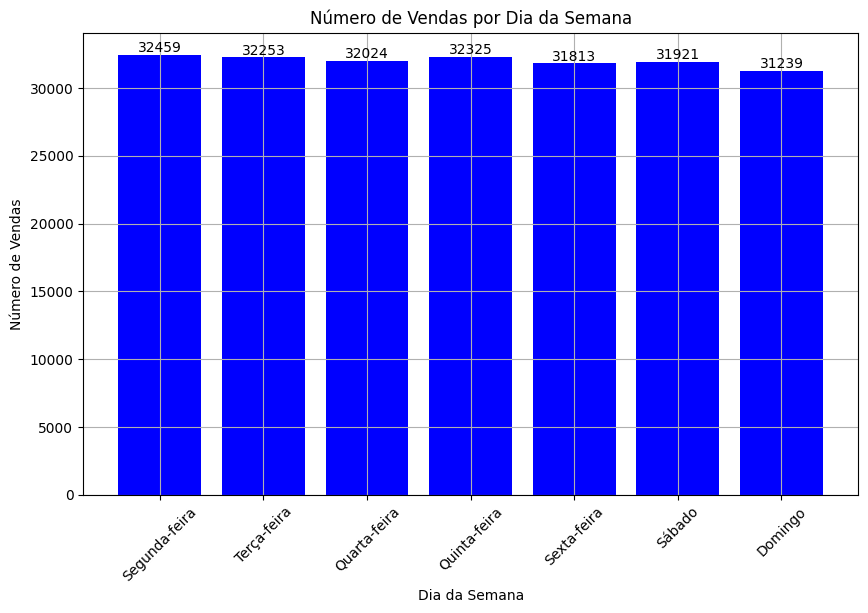

In [131]:
cores = plt.cm.tab10(np.arange(len(vendas_por_dia_da_semana)))

plt.figure(figsize=(10, 6))
bars = plt.bar(nome_dia_semana.values(), vendas_por_dia_da_semana.values, color='blue')

for bar, venda in zip(bars, vendas_por_dia_da_semana.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(venda), ha='center', va='bottom')

plt.title('Número de Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Vendas')

plt.xticks(rotation=45) 
plt.grid(True)  
plt.show()

In [132]:
grouped = df.groupby(['Dia da Semana', 'Hora', 'Produto'])['Quantidade'].sum().reset_index()

# Encontrando o produto mais vendido em cada hora do dia para cada dia da semana
mais_vendido_por_hora = grouped.groupby(['Dia da Semana', 'Hora']).apply(lambda x: x.loc[x['Quantidade'].idxmax()])


In [133]:
# Encontrando o produto mais vendido por hora de cada dia da semana
mais_vendido_por_hora = mais_vendido_por_hora.set_index(['Dia da Semana'], drop = True)
mais_vendido_por_hora 

,Hora,Produto,Quantidade
Dia da Semana,,,
0,0,Pepsi - 12 oz cans,91
0,1,Pepsi - 12 oz cans,96
0,2,Folgers 100% Colombian Coffee,92
0,3,Coke Classic 12 oz cans,85
0,4,Coke Classic 12 oz cans,82
...,...,...,...
6,19,Diet Coke - 12 oz cans,97
6,20,Brisk Lemon Iced Tea - 12 oz cans,80
6,21,Hawaiian Punch - 12 oz cans,86


In [134]:
grouped_2 = df.groupby(['Hora', 'Produto'])['Quantidade'].sum().reset_index()

if grouped_2['Quantidade'].isnull().any():
    grouped_2['Quantidade'] = grouped_2['Quantidade'].fillna(0)

mais_vendidos_por_hora_2 = grouped_2.loc[grouped_2.groupby('Hora')['Quantidade'].idxmax()]

In [135]:
# Encontrando o produto mais vendido por hora usando a média de todos os dias como referência
mais_vendidos_por_hora_2

,Hora,Produto,Quantidade
186,0,Pepsi - 12 oz cans,434
445,1,Pepsi - 12 oz cans,511
679,2,Muscle Milk Protein Shake Van. 11oz,456
963,3,Pepsi - 12 oz cans,529
1077,4,Coke Classic 12 oz cans,500
1336,5,Coke Classic 12 oz cans,487
1740,6,Pepsi - 12 oz cans,487
1854,7,Coke Classic 12 oz cans,439
2113,8,Coke Classic 12 oz cans,545
2553,9,Sprite - 12 oz cans,496


In [136]:
grouped_3 = df.groupby(['Hora', 'Produto'])['Quantidade'].sum().reset_index()

if grouped_3['Quantidade'].isnull().any():
    grouped_3['Quantidade'] = grouped_3['Quantidade'].fillna(0)

menos_vendidos_por_hora = grouped_3.loc[grouped_3.groupby('Hora')['Quantidade'].idxmin()]


In [137]:
# Encontrando o produto menos vendido em cada hora
menos_vendidos_por_hora

,Hora,Produto,Quantidade
141,0,La Croix Sparkling Pure 12 oz,81
401,1,Lance Variety Cracker Packs,110
697,2,POM 2 ply paper towels,105
952,3,Ocean Spray Cranberry Juice Cocktail 15oz,103
1092,4,Diet Mountain Dew 12oz cans,113
1325,5,Chinet Comfort Hot Cups with Lids 16oz,80
1565,6,Barq's Root Beer - 12 oz cans,117
2070,7,Yoplait Original Yogurt Variety Pack,117
2256,8,Peanutbutter Filled Pretzels,97
2390,9,Dole Fruit in Gel Cups 4.3 oz,116


In [138]:
pivot_df = df.pivot_table(index='Hora', columns='Produto', values='Quantidade', aggfunc='sum')

pivot_df.fillna(0, inplace=True)

correlation_matrix = pivot_df.corr()

print(correlation_matrix)


Produto                                100% Juice Box Variety 6.75 oz   \
Produto                                                                  
100% Juice Box Variety 6.75 oz                                1.000000   
A&W Root Beer - 12 oz cans                                    0.236819   
A&W Root Beer Diet - 12 oz cans                              -0.155967   
Advil 2 pill packets                                          0.049005   
All Purpose Cleaner 409 Spray                                -0.035882   
...                                                                ...   
Welch's 100% Juice Variety10 oz                               0.137956   
Wint O Green LifeSavers Sugar Free                           -0.125448   
Wonderful Pistachios (in shell)                               0.073716   
Yoplait Original Yogurt Variety Pack                         -0.282662   
Zoo Animal Cookies/Crackers                                   0.256900   

Produto                              

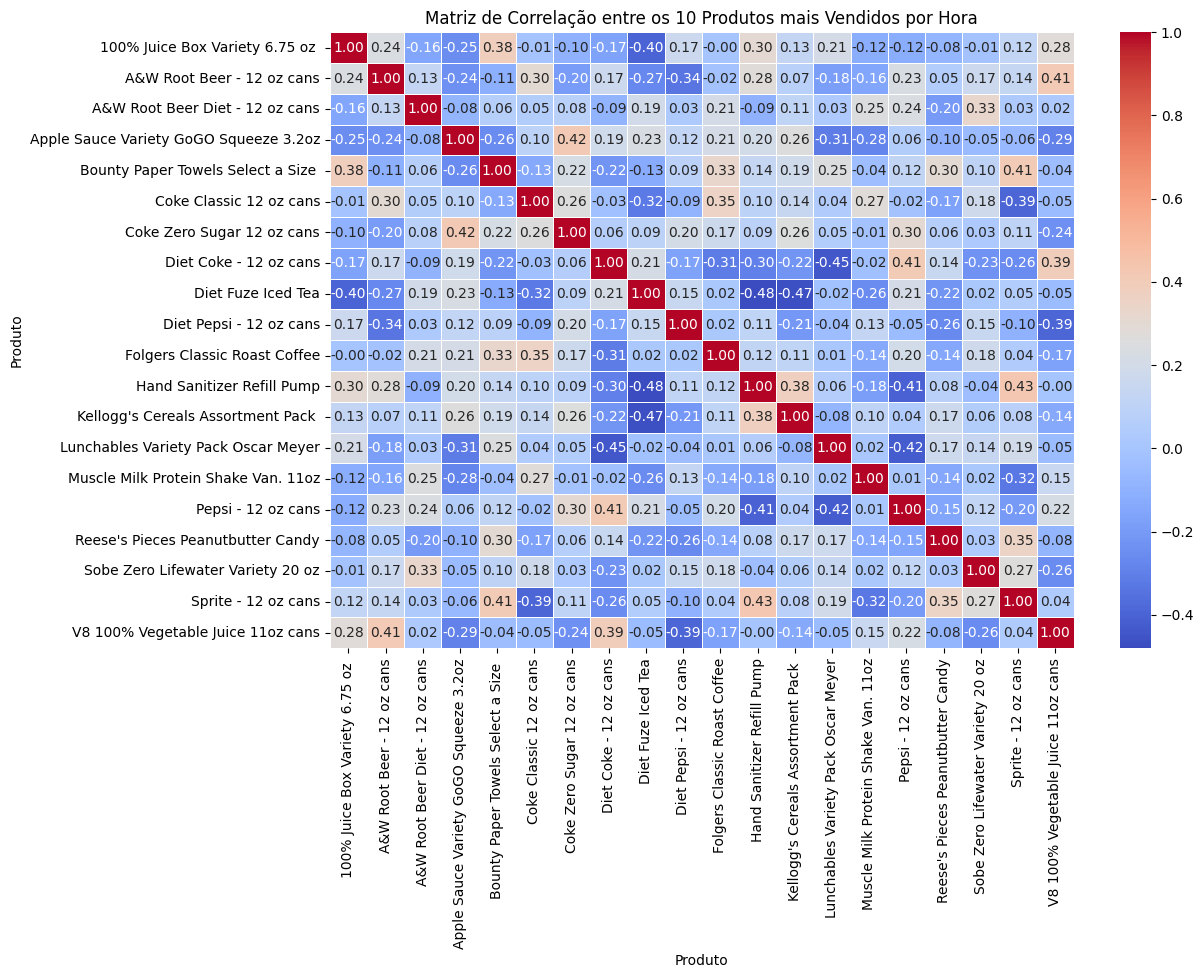

In [139]:
total_vendas_por_produto = df.groupby('Produto')['Quantidade'].sum()

top_n_products = total_vendas_por_produto.nlargest(20).index

df_top_products = df[df['Produto'].isin(top_n_products)]

pivot_df_top_produtos = df_top_products.pivot_table(index='Hora', columns='Produto', values='Quantidade', aggfunc='sum')

pivot_df_top_produtos.fillna(0, inplace=True)

correlacao_matriz = pivot_df_top_produtos.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacao_matriz, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre os 10 Produtos mais Vendidos por Hora')
plt.show()


In [140]:
pares_correlacionados = correlacao_matriz.unstack().sort_values(ascending=False)
pares_nao_correlacionados = correlacao_matriz.unstack().sort_values()

pares_correlacionados = pares_correlacionados[pares_correlacionados != 1]
pares_nao_correlacionados = pares_nao_correlacionados[pares_nao_correlacionados != 1]

top_10_mais_correlacionados = pares_correlacionados.head(10)
top_10_menos_correlacionados = pares_nao_correlacionados.head(10)

print("Top 10 Pares de Produtos com Mais Correlação:")
print(top_10_mais_correlacionados)
print("\nTop 10 Pares de Produtos com Menos Correlação:")
print(top_10_menos_correlacionados)


Top 10 Pares de Produtos com Mais Correlação:
Produto                                 Produto                               
Hand Sanitizer Refill Pump              Sprite - 12 oz cans                       0.427925
Sprite - 12 oz cans                     Hand Sanitizer Refill Pump                0.427925
Apple Sauce Variety GoGO Squeeze 3.2oz  Coke Zero Sugar 12 oz cans                0.421122
Coke Zero Sugar 12 oz cans              Apple Sauce Variety GoGO Squeeze 3.2oz    0.421122
V8 100% Vegetable Juice 11oz cans       A&W Root Beer - 12 oz cans                0.412384
A&W Root Beer - 12 oz cans              V8 100% Vegetable Juice 11oz cans         0.412384
Diet Coke - 12 oz cans                  Pepsi - 12 oz cans                        0.408203
Pepsi - 12 oz cans                      Diet Coke - 12 oz cans                    0.408203
Sprite - 12 oz cans                     Bounty Paper Towels Select a Size         0.407869
Bounty Paper Towels Select a Size       Sprite - 12 oz c

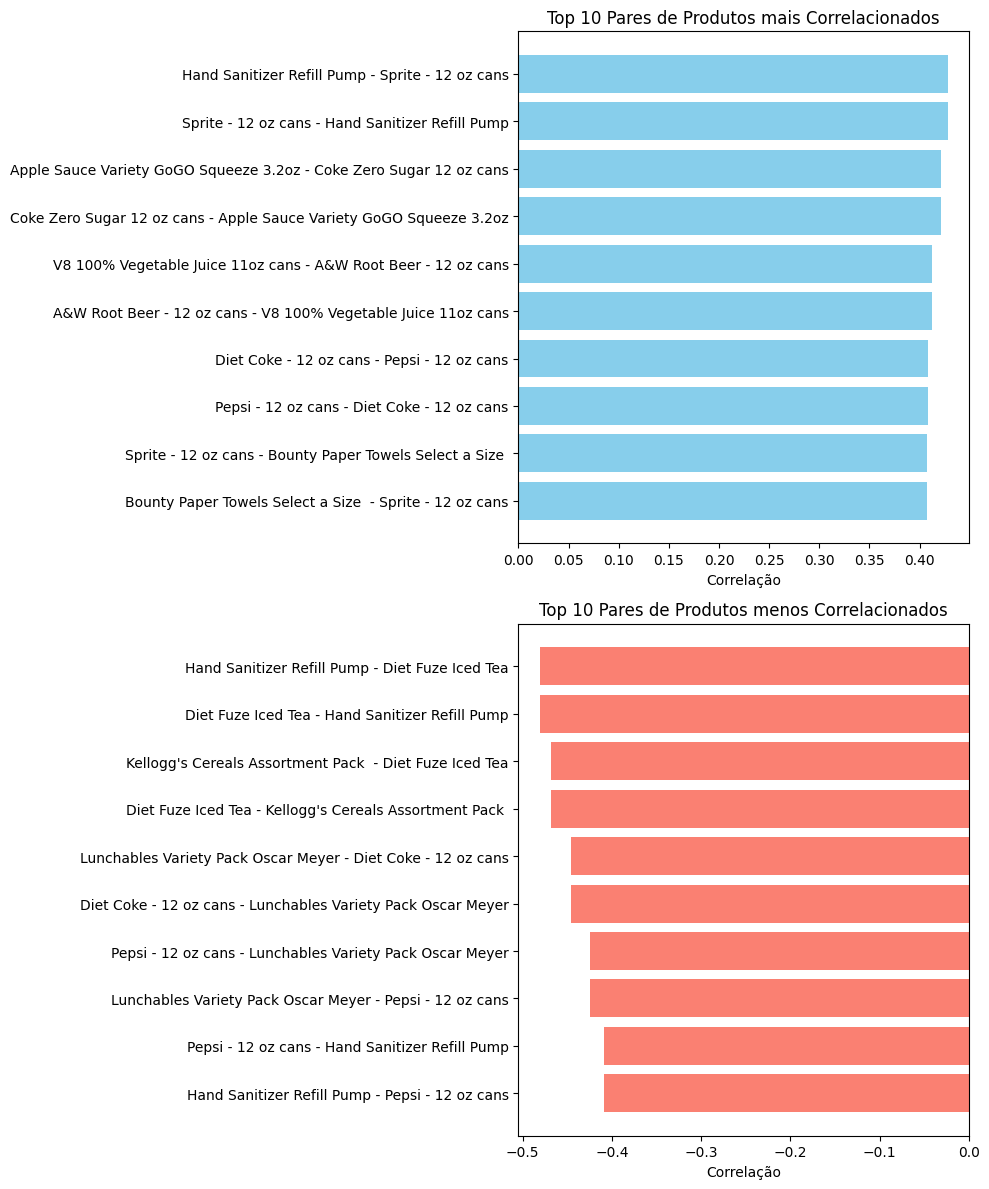

In [141]:
top_10_mais_correlacionados_str = [f"{pair[0]} - {pair[1]}" for pair in top_10_mais_correlacionados.index]
top_10_menos_correlacionados_str = [f"{pair[0]} - {pair[1]}" for pair in top_10_menos_correlacionados.index]

# Configurar a figura e os eixos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plotar os top 10 pares de produtos mais correlacionados
axes[0].barh(top_10_mais_correlacionados_str, top_10_mais_correlacionados.values, color='skyblue')
axes[0].set_xlabel('Correlação')
axes[0].set_title('Top 10 Pares de Produtos mais Correlacionados')
axes[0].invert_yaxis()  # Inverter o eixo y para que o maior valor fique no topo

# Plotar os top 10 pares de produtos menos correlacionados
axes[1].barh(top_10_menos_correlacionados_str, top_10_menos_correlacionados.values, color='salmon')
axes[1].set_xlabel('Correlação')
axes[1].set_title('Top 10 Pares de Produtos menos Correlacionados')
axes[1].invert_yaxis()  # Inverter o eixo y para que o maior valor fique no topo

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


# MODELAGEM E MACHINE LEARNING

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet

In [143]:
df.head()

,Unnamed: 0,Produto,Quantidade,Preco Unitario,Preco Total,Forma de Pagamento,Hora da Venda,Local da Loja,Chave do Produto,Hora,Dia da Semana,Ano
0,1,Charmin Ultra Bath Tissue,1,26.0,26.0,1,2018-06-11 19:08:00,DHAKA,I00248,19,0,2018
1,9,Clear Plastic Cups 9oz,10,15.0,150.0,1,2018-02-13 01:12:00,DHAKA,I00133,1,1,2018
2,12,Breath Savers Peppermints 12/roll,3,16.0,48.0,1,2019-04-19 03:38:00,DHAKA,I00237,3,4,2019
3,17,Doritos Nacho Cheese 1 oz,9,17.0,153.0,1,2016-11-26 10:50:00,DHAKA,I00155,10,5,2016
4,19,Cheez It White Cheddar 1.5 oz,4,15.0,60.0,1,2021-01-09 19:34:00,DHAKA,I00153,19,5,2021


        Data  Quantidade  Preco Total
0 2014-01-20         264      4058.00
1 2014-01-21         559     10004.50
2 2014-01-22         495      8511.50
3 2014-01-23         500      9249.25
4 2014-01-24         583     10445.75


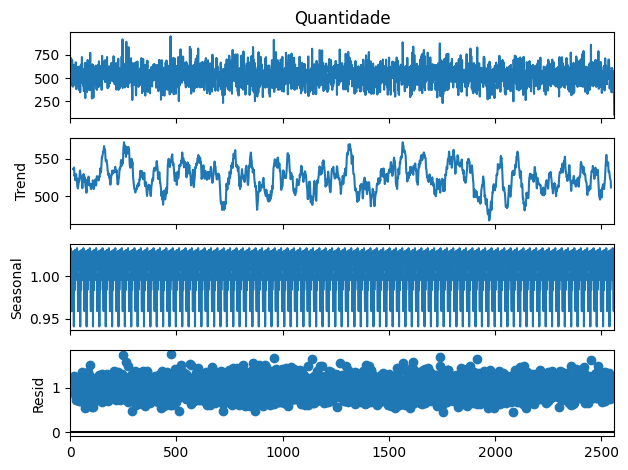

14:00:18 - cmdstanpy - INFO - Chain [1] start processing
14:00:20 - cmdstanpy - INFO - Chain [1] done processing


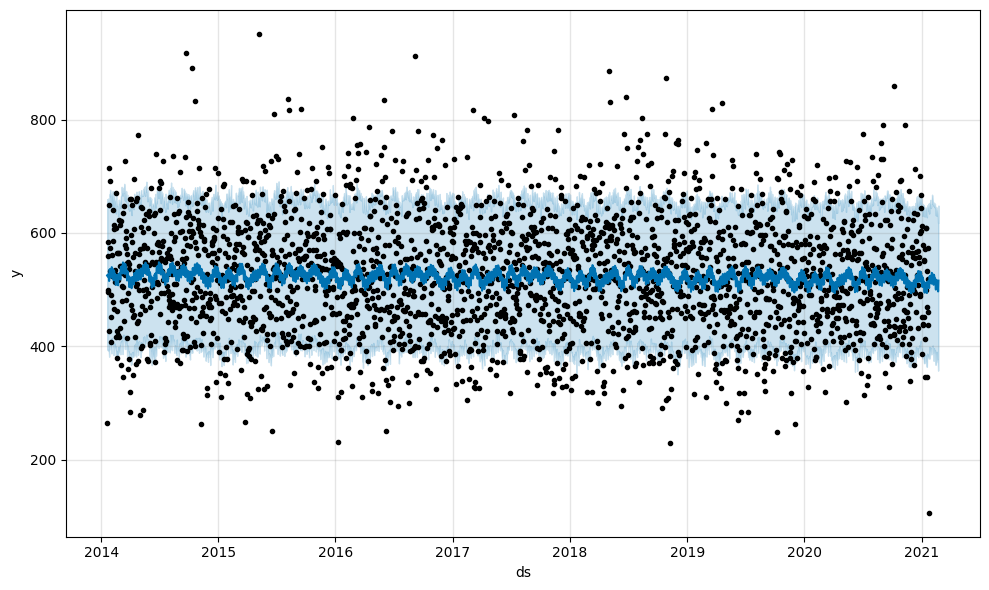

Train set:
         Data  Quantidade  Preco Total
0 2014-01-20         264      4058.00
1 2014-01-21         559     10004.50
2 2014-01-22         495      8511.50
3 2014-01-23         500      9249.25
4 2014-01-24         583     10445.75
Test set:
            Data  Quantidade  Preco Total
2048 2019-08-30         362      6761.50
2049 2019-08-31         321      5716.50
2050 2019-09-01         369      5731.50
2051 2019-09-02         596     10770.50
2052 2019-09-03         439      7729.75
X_train shape: (2048, 2)
y_train shape: (2048,)
X_test shape: (513, 2)
y_test shape: (513,)
X_train missing values:
 Quantidade     0
Preco Total    0
dtype: int64
X_test missing values:
 Quantidade     0
Preco Total    0
dtype: int64
y_train missing values:
 0
y_test missing values:
 0
X_train types:
 Quantidade       int64
Preco Total    float64
dtype: object
X_test types:
 Quantidade       int64
Preco Total    float64
dtype: object
X_train empty rows:
 Empty DataFrame
Columns: [Quantidade, Preco

In [144]:
df['Hora da Venda'] = pd.to_datetime(df['Hora da Venda'])

df['Mes'] = df['Hora da Venda'].dt.month
df['Dia'] = df['Hora da Venda'].dt.day
df['Hora'] = df['Hora da Venda'].dt.hour

df_daily = df.groupby(df['Hora da Venda'].dt.date).agg({
    'Quantidade': 'sum',
    'Preco Total': 'sum'
}).reset_index()

df_daily.rename(columns={'Hora da Venda': 'Data'}, inplace=True)
df_daily['Data'] = pd.to_datetime(df_daily['Data'])

print(df_daily.head())

# Decomposição de série temporal
result = seasonal_decompose(df_daily['Quantidade'], model='multiplicative', period=30)
result.plot()
plt.show()

# Preparação para o modelo Prophet
df_prophet = df_daily.rename(columns={'Data': 'ds', 'Quantidade': 'y'})
model = Prophet()
model.fit(df_prophet)

# Fazer e visualizar previsões
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

fig = model.plot(forecast)
plt.show()

train, test = train_test_split(df_daily, test_size=0.2, shuffle=False)

print("Train set:\n", train.head())
print("Test set:\n", test.head())

# Dados para RandomForestRegressor
X_train = train.drop(['Data'], axis=1) 
y_train = train['Quantidade']  
X_test = test.drop(['Data'], axis=1)  
y_test = test['Quantidade']  

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("X_train missing values:\n", X_train.isnull().sum())
print("X_test missing values:\n", X_test.isnull().sum())
print("y_train missing values:\n", y_train.isnull().sum())
print("y_test missing values:\n", y_test.isnull().sum())

print("X_train types:\n", X_train.dtypes)
print("X_test types:\n", X_test.dtypes)

print("X_train empty rows:\n", X_train[X_train.isnull().all(axis=1)])
print("X_test empty rows:\n", X_test[X_test.isnull().all(axis=1)])
print("y_train empty rows:\n", y_train[y_train.isnull()])
print("y_test empty rows:\n", y_test[y_test.isnull()])

if X_train.empty or y_train.empty or X_test.empty or y_test.empty:
    print("Um dos conjuntos de dados está vazio. Verifique os dados de entrada.")
else:
    # RandomForestRegressor
    model_rf = RandomForestRegressor()
    model_rf.fit(X_train, y_train)

    predictions = model_rf.predict(X_test)

    # Erro
    mse = mean_squared_error(y_test, predictions)
    print(f'MSE: {mse:.2f}%.')

## Criando DataFrame futuro para os próximos anos

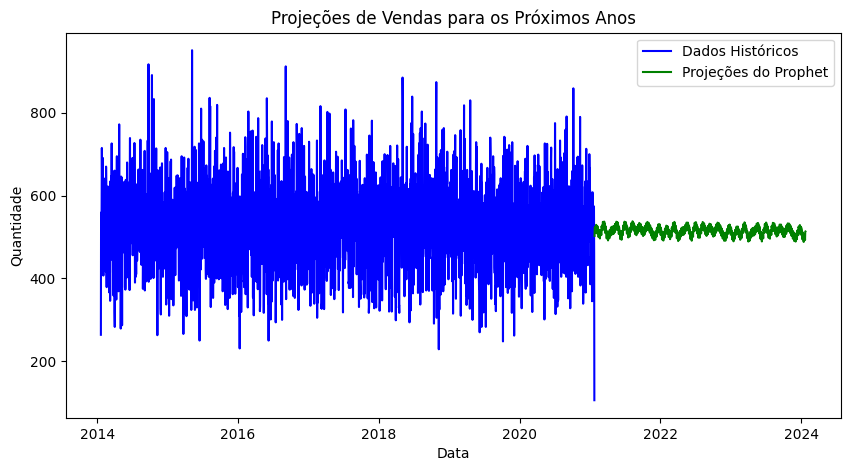

In [145]:
future_years = 3
future_dates = pd.date_range(start=df_daily['Data'].max() + pd.Timedelta(days=1), periods=365 * future_years, freq='D')
future_df = pd.DataFrame({'Data': future_dates})

future_df = pd.DataFrame({'Data': future_dates})
future_df['Quantidade'] = 0  
future_df['Preco Total'] = 0  

# Fazer previsões diretamente no DataFrame futuro com o Prophet
future_prophet_predictions = model.predict(future_df.rename(columns={'Data': 'ds'}))

# Fazer previsões diretamente no DataFrame futuro com o RandomForestRegressor
future_rf_predictions = model_rf.predict(future_df.drop('Data', axis=1))

# Plotar as projeções
plt.figure(figsize=(10, 5))
plt.plot(df_daily['Data'], df_daily['Quantidade'], label='Dados Históricos', color='blue')
plt.plot(future_df['Data'], future_prophet_predictions['yhat'], label='Projeções do Prophet', color='green')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.legend()
plt.title('Projeções de Vendas para os Próximos Anos')
plt.show()


# UMA VEZ QUE OS GRÁFICOS RESULTANTES DO RANDOM FOREST NÃO FORAM SATISFATÓRIOS, APENAS A PREVISÃO UTILIZANDO PROPHET FOI UTILIZADA.

In [146]:
print('Concluído !!')

Concluído !!
